In [13]:
import numpy as np
import pandas as pd
import os

In [9]:
data_path = '/Users/mylesgould/Downloads/project/data/'

In [10]:
labels = ['rotate_next', 'rotate_prev', 'like', 'stop', 'other']

In [11]:
label_to_idx = {
    'rotate_next': 1,
    'rotate_prev': 2,
    'like': 3,
    'stop': 4,
    'other': 5
}

In [5]:
idx_to_label = {
    1: 'rotate_next',
    2: 'rotate_prev',
    3: 'like',
    4: 'stop',
    5: 'other'
}

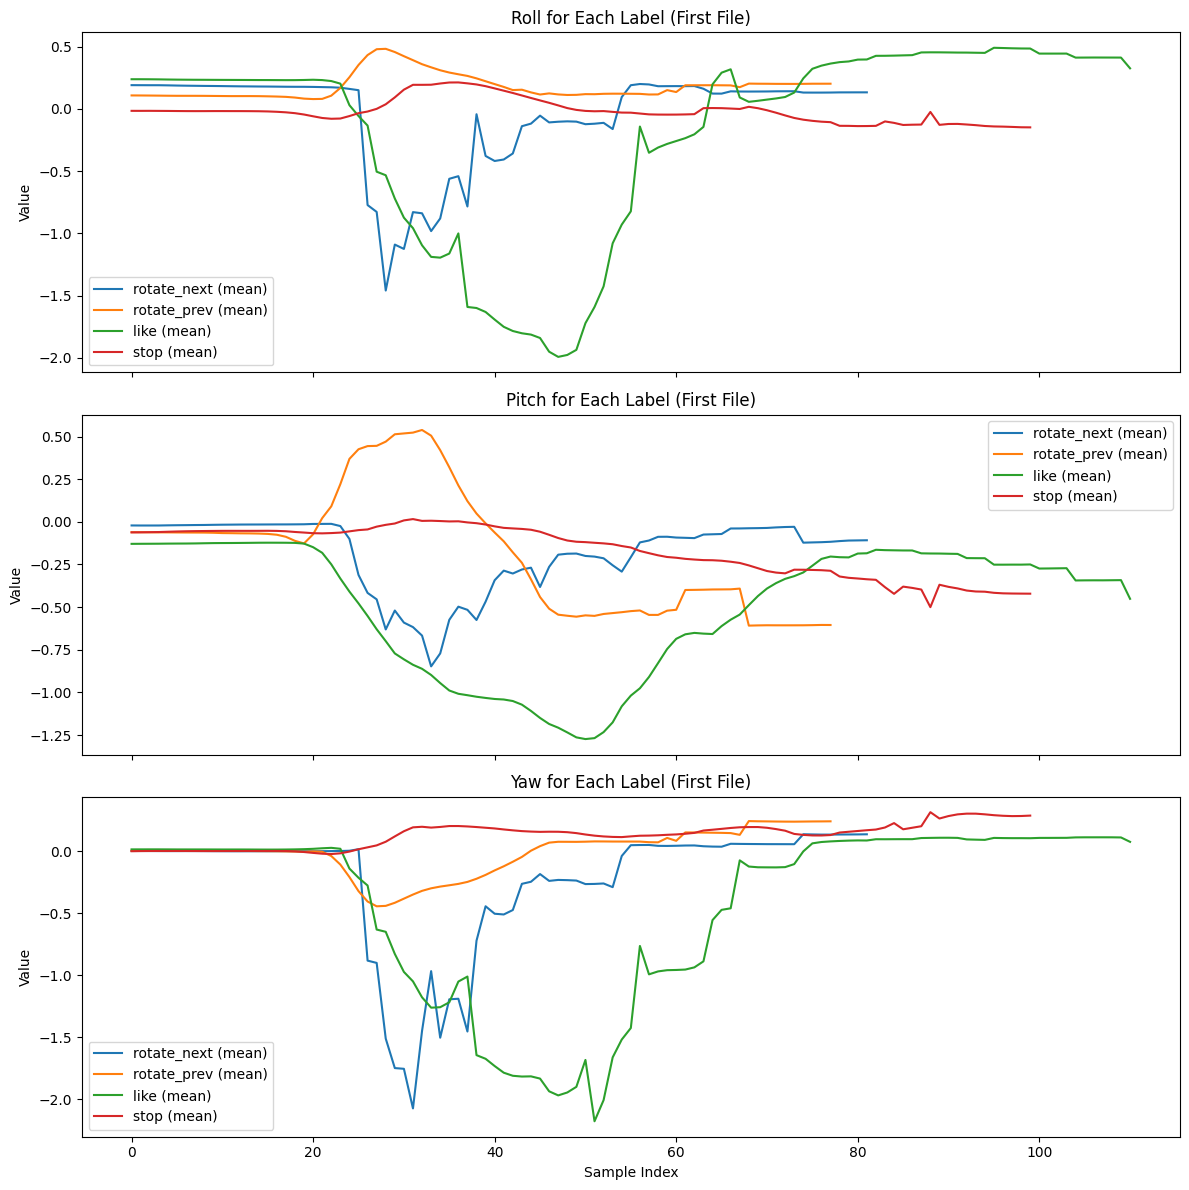

In [60]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

axes = ['roll', ' pitch', 'yaw']
titles = ['Roll', 'Pitch', 'Yaw']

for i, axis in enumerate(axes):
    for label in labels:
        csv_path = os.path.join(data_path, label, 'csv')
        files = os.listdir(csv_path)
        if not files:
            continue  # skip if no files in the folder
        # Read all files and compute the average for the current axis
        all_values = []
        for file in files:
            df = pd.read_csv(os.path.join(csv_path, file))
            all_values.append(df[axis].values)
        # Pad shorter arrays with NaN to match the longest
        max_len = max(len(arr) for arr in all_values)
        all_values_padded = [np.pad(arr, (0, max_len - len(arr)), constant_values=np.nan) for arr in all_values]
        mean_values = np.nanmean(all_values_padded, axis=0)
        axs[i].plot(mean_values, label=f'{label} (mean)')
        df = pd.read_csv(os.path.join(csv_path, file))
        #axs[i].plot(df[axis].values, label=f'{label} ({file})')
    axs[i].set_title(f'{titles[i]} for Each Label (First File)')
    axs[i].set_ylabel('Value')
    axs[i].legend()

axs[2].set_xlabel('Sample Index')
plt.tight_layout()
plt.show()

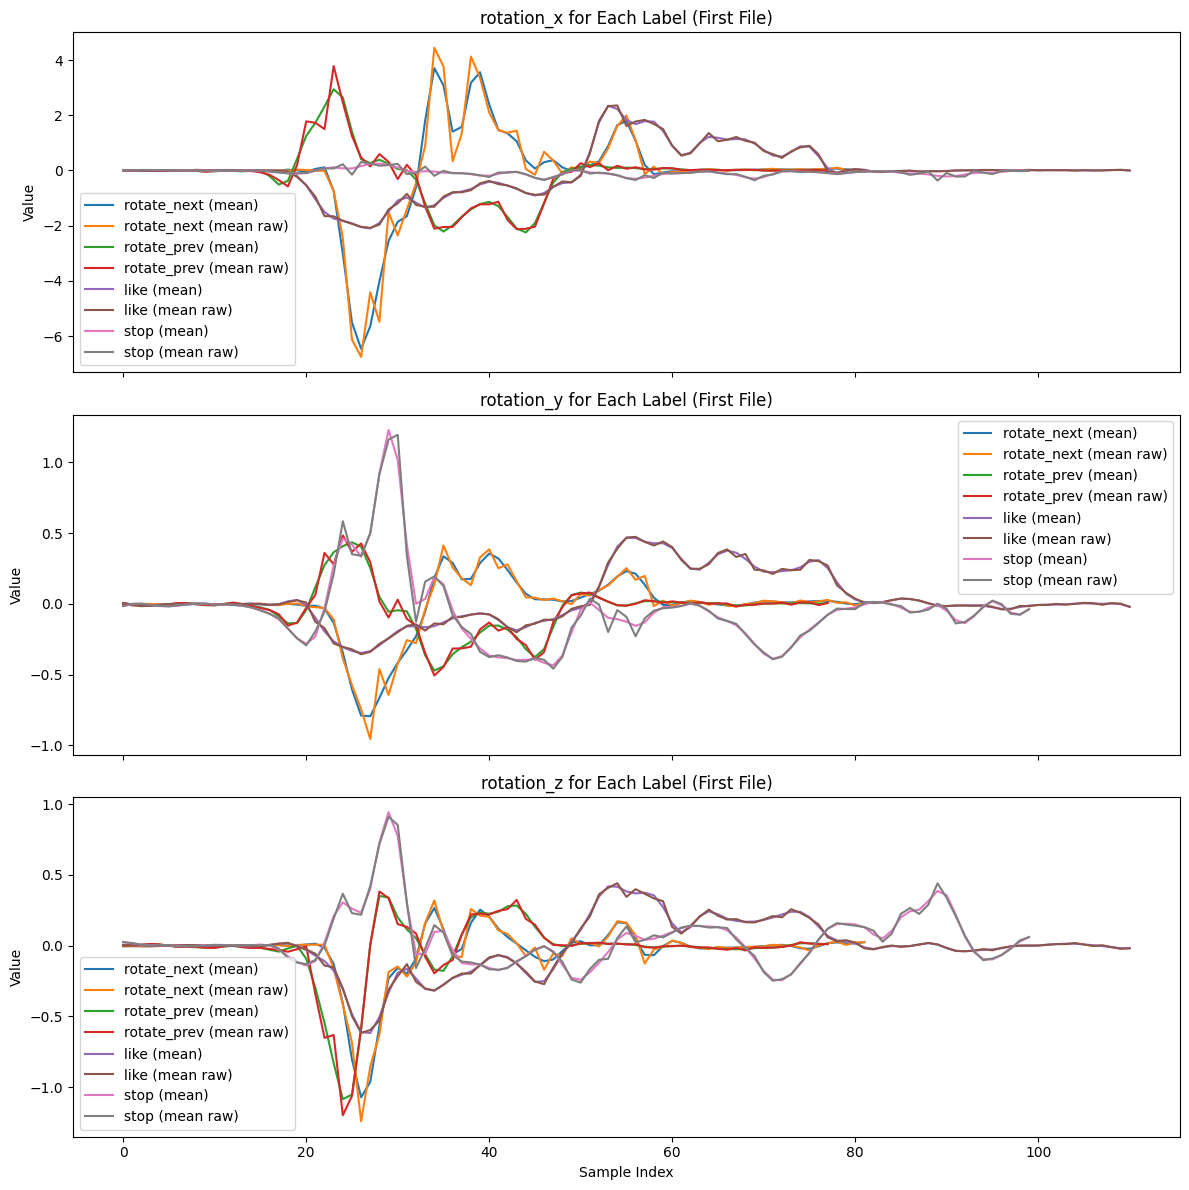

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# axes = ['roll', ' pitch', 'yaw']
axes = ['rotation_x', 'rotation_y', 'rotation_z']
titles = ['rotation_x', 'rotation_y', 'rotation_z']
for i, axis in enumerate(axes):
    for label in labels:
        csv_path = os.path.join(data_path, label, 'csv')
        files = os.listdir(csv_path)
        if not files:
            continue  # skip if no files in the folder
        # Read all files and compute the average for the current axis
        all_values = []
        for file in files:
            df = pd.read_csv(os.path.join(csv_path, file))
            all_values.append(df[axis].values)
        # Pad shorter arrays with NaN to match the longest
        max_len = max(len(arr) for arr in all_values)
        all_values_padded = [np.pad(arr, (0, max_len - len(arr)), constant_values=np.nan) for arr in all_values]
        mean_values = np.nanmean(all_values_padded, axis=0)

        # 4. Butterworth Low-pass Filter
        b, a = butter(N=3, Wn=.5)
        butter_filtered = filtfilt(b, a, mean_values)

        axs[i].plot(butter_filtered, label=f'{label} (mean)')
        axs[i].plot(mean_values, label=f'{label} (mean raw)')
        df = pd.read_csv(os.path.join(csv_path, file))
        break
        #axs[i].plot(df[axis].values, label=f'{label} ({file})')
    axs[i].set_title(f'{titles[i]} for Each Label (First File)')
    axs[i].set_ylabel('Value')
    axs[i].legend()

axs[2].set_xlabel('Sample Index')
plt.tight_layout()
plt.show()

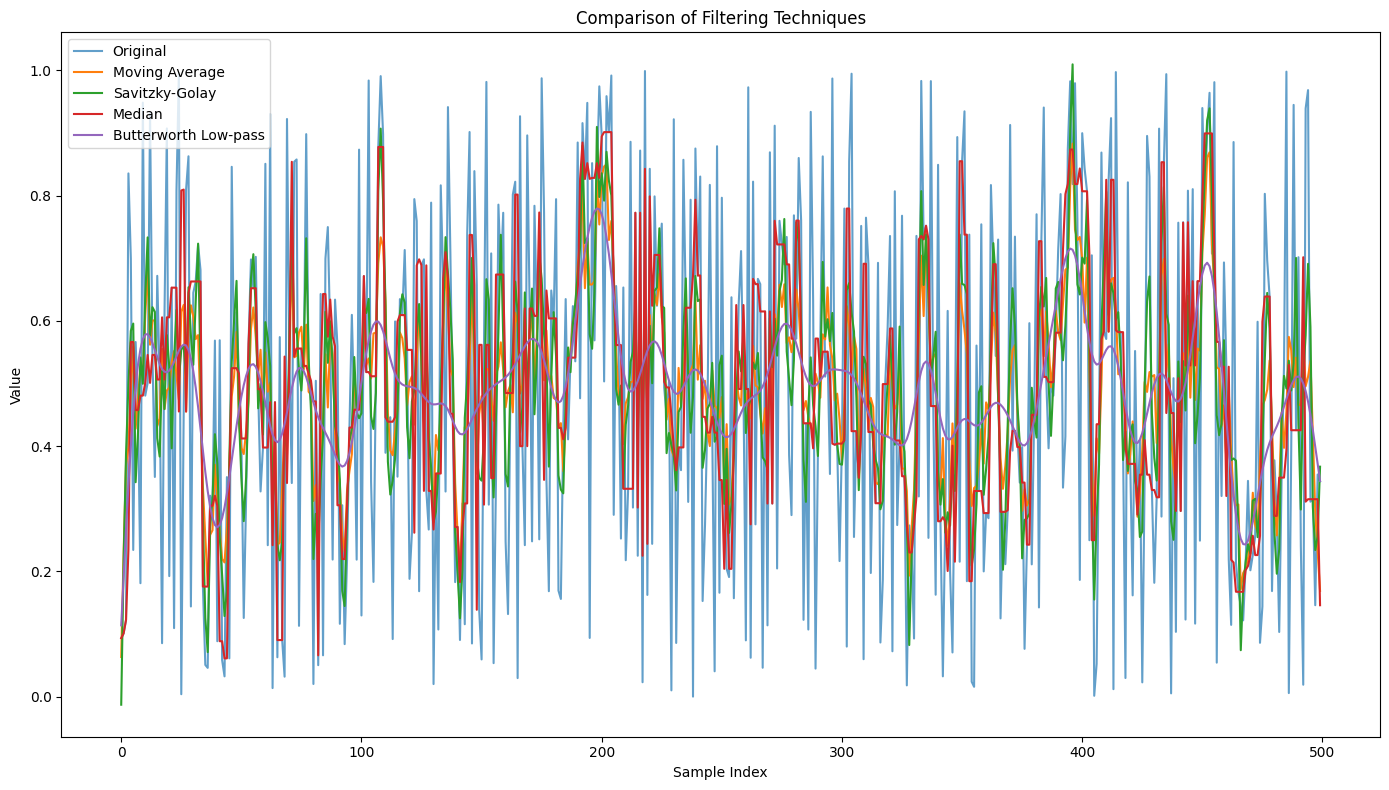

In [7]:
import random
import numpy as np
from scipy.signal import savgol_filter, medfilt, butter, filtfilt

# Generate random values
random_values = [random.random() for _ in range(500)]

import matplotlib.pyplot as plt

# Example signal: use mean_values if available, else random_values
signal = mean_values if 'mean_values' in locals() else np.array(random_values)

# 1. Moving Average Filter
window_size = 5
moving_avg = np.convolve(signal, np.ones(window_size)/window_size, mode='same')

# 2. Savitzky-Golay Filter
savgol = savgol_filter(signal, window_length=7, polyorder=2)

# 3. Median Filter
median = medfilt(signal, kernel_size=5)

# 4. Butterworth Low-pass Filter
b, a = butter(N=3, Wn=0.1)
butter_filtered = filtfilt(b, a, signal)

plt.figure(figsize=(14, 8))
plt.plot(signal, label='Original', alpha=0.7)
plt.plot(moving_avg, label='Moving Average')
plt.plot(savgol, label='Savitzky-Golay')
plt.plot(median, label='Median')
plt.plot(butter_filtered, label='Butterworth Low-pass')
plt.legend()
plt.title('Comparison of Filtering Techniques')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

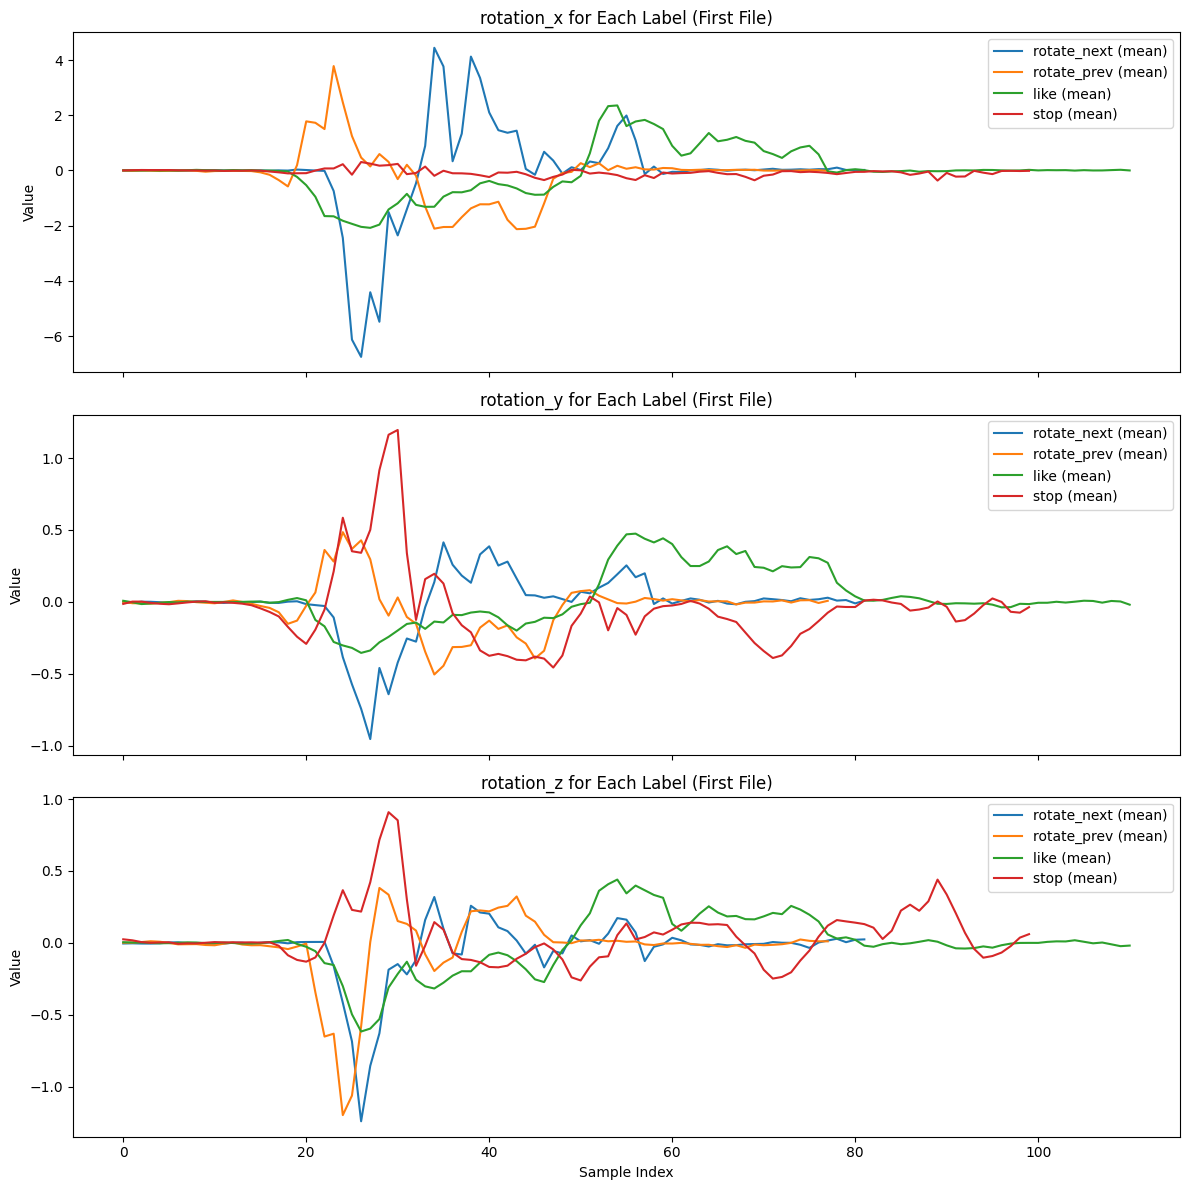

In [61]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# axes = ['roll', ' pitch', 'yaw']
axes = ['rotation_x', 'rotation_y', 'rotation_z']
titles = ['rotation_x', 'rotation_y', 'rotation_z']
for i, axis in enumerate(axes):
    for label in labels:
        csv_path = os.path.join(data_path, label, 'csv')
        files = os.listdir(csv_path)
        if not files:
            continue  # skip if no files in the folder
        # Read all files and compute the average for the current axis
        all_values = []
        for file in files:
            df = pd.read_csv(os.path.join(csv_path, file))
            all_values.append(df[axis].values)
        # Pad shorter arrays with NaN to match the longest
        max_len = max(len(arr) for arr in all_values)
        all_values_padded = [np.pad(arr, (0, max_len - len(arr)), constant_values=np.nan) for arr in all_values]
        mean_values = np.nanmean(all_values_padded, axis=0)
        axs[i].plot(mean_values, label=f'{label} (mean)')
        df = pd.read_csv(os.path.join(csv_path, file))
        #axs[i].plot(df[axis].values, label=f'{label} ({file})')
    axs[i].set_title(f'{titles[i]} for Each Label (First File)')
    axs[i].set_ylabel('Value')
    axs[i].legend()

axs[2].set_xlabel('Sample Index')
plt.tight_layout()
plt.show()

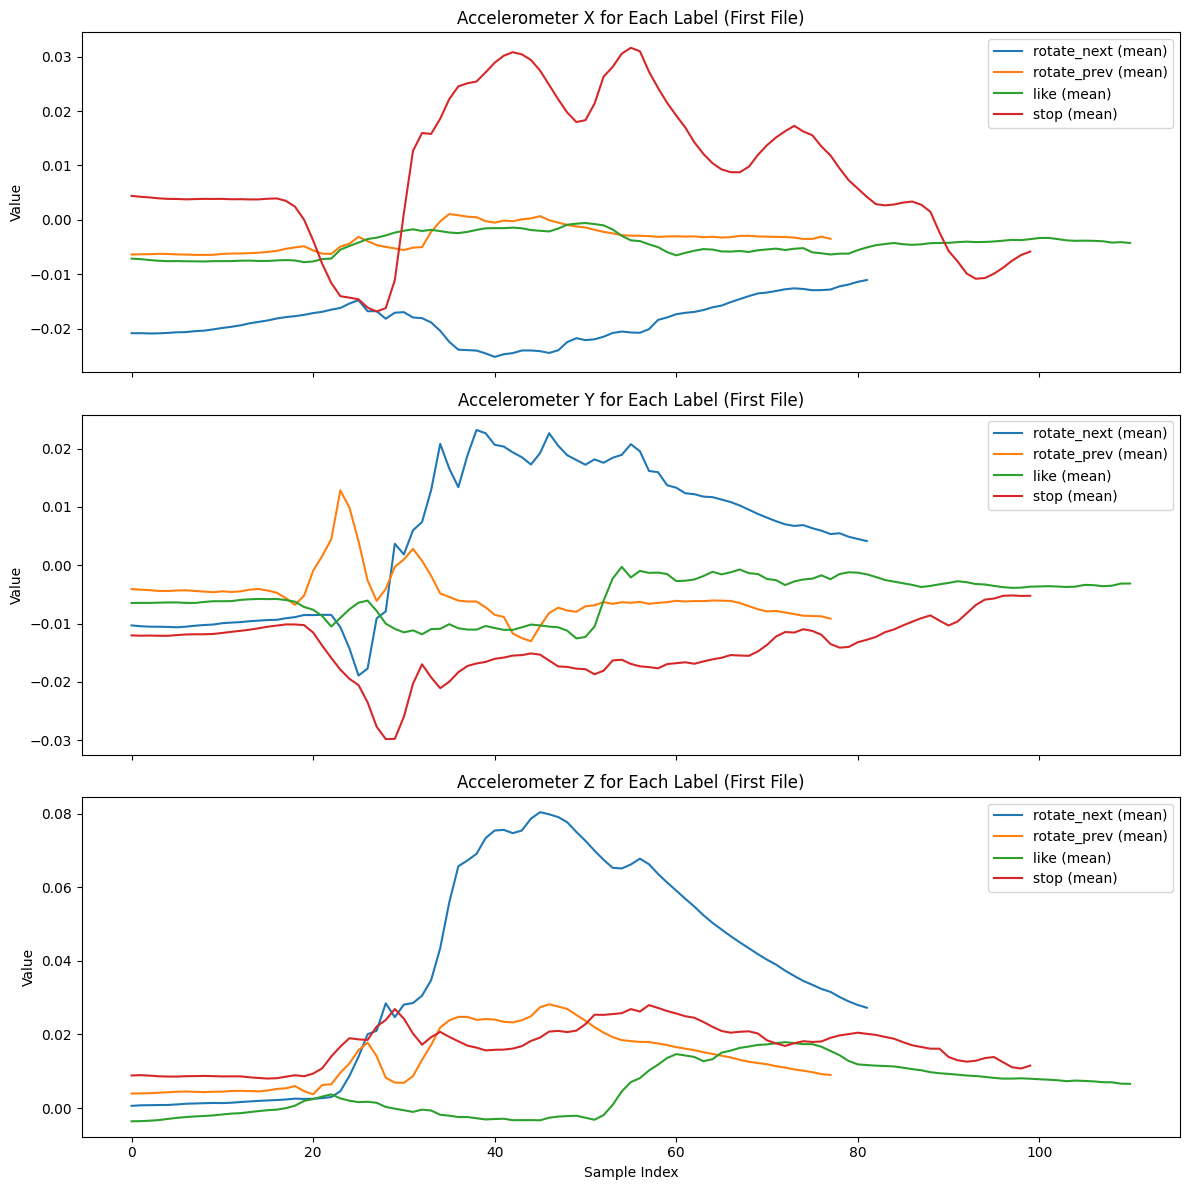

In [62]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# axes = ['roll', ' pitch', 'yaw']
axes = ['accel_x', 'accel_y', 'accel_z']
titles = ['Accelerometer X', 'Accelerometer Y', 'Accelerometer Z']
for i, axis in enumerate(axes):

    for label in labels:
        csv_path = os.path.join(data_path, label, 'csv')
        files = os.listdir(csv_path)
        if not files:
            continue  # skip if no files in the folder
        # Read all files and compute the average for the current axis
        all_values = []
        for file in files:
            df = pd.read_csv(os.path.join(csv_path, file))
            all_values.append(df[axis].values)
        # Pad shorter arrays with NaN to match the longest
        max_len = max(len(arr) for arr in all_values)
        all_values_padded = [np.pad(arr, (0, max_len - len(arr)), constant_values=np.nan) for arr in all_values]
        mean_values = np.nanmean(all_values_padded, axis=0)
        # Compute exponential moving average with beta=0.96
        beta = 0.96
        ema = np.zeros_like(mean_values)
        ema[0] = mean_values[0]
        for t in range(1, len(mean_values)):
            ema[t] = beta * ema[t-1] + (1 - beta) * mean_values[t]
        axs[i].plot(ema, label=f'{label} (mean)')
        df = pd.read_csv(os.path.join(csv_path, file))
        #axs[i].plot(df[axis].values, label=f'{label} ({file})')
    axs[i].set_title(f'{titles[i]} for Each Label (First File)')
    axs[i].set_ylabel('Value')
    axs[i].legend()

axs[2].set_xlabel('Sample Index')
plt.tight_layout()
plt.show()

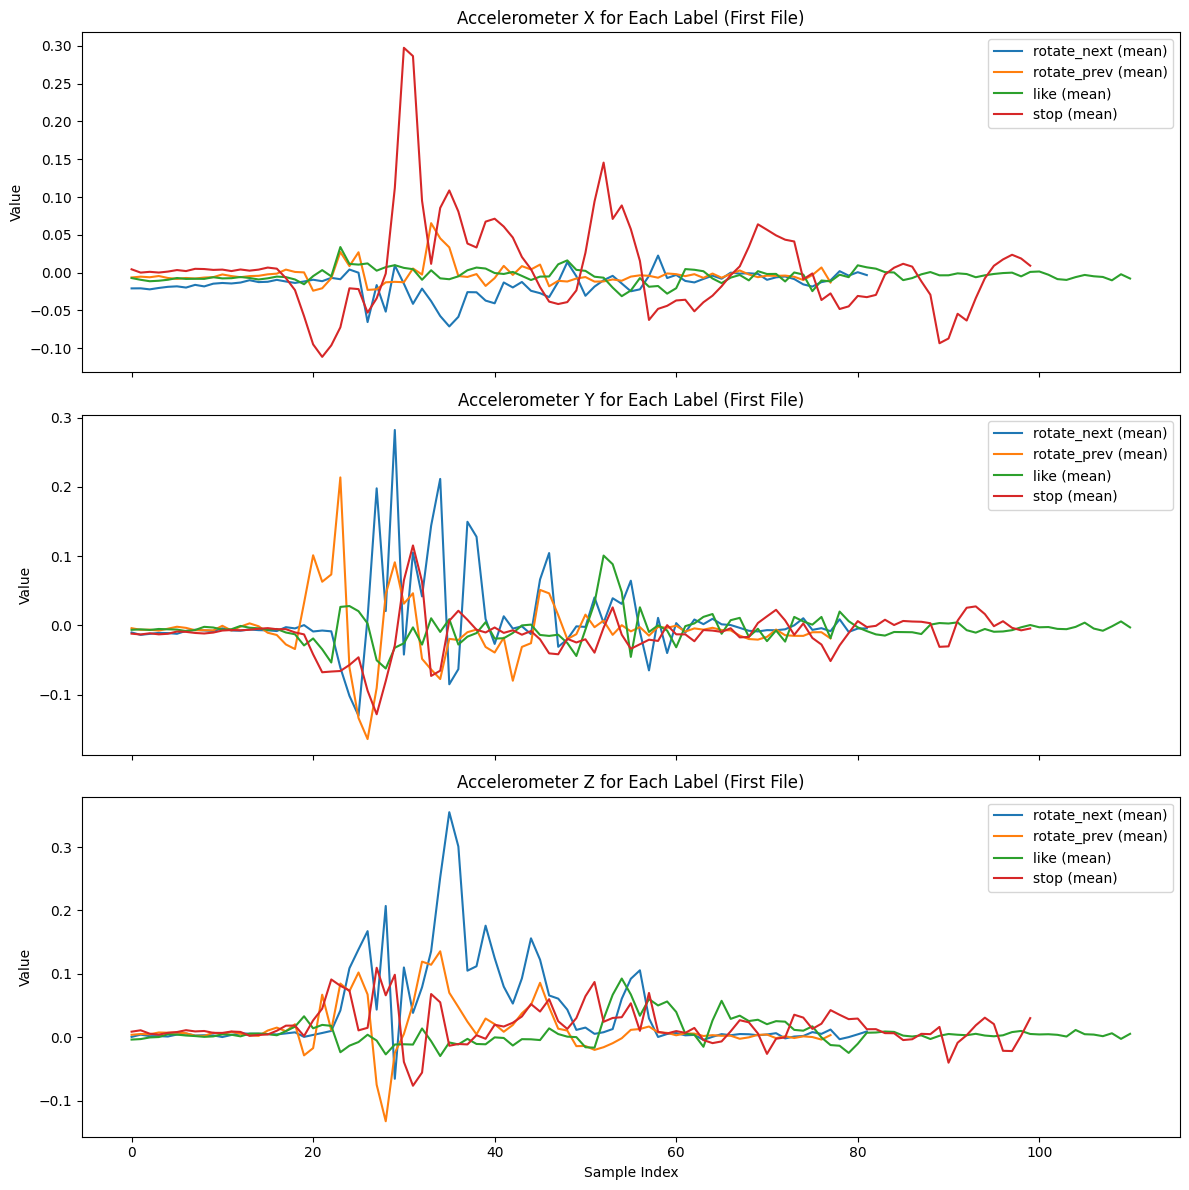

In [59]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# axes = ['roll', ' pitch', 'yaw']
axes = ['accel_x', 'accel_y', 'accel_z']
titles = ['Accelerometer X', 'Accelerometer Y', 'Accelerometer Z']
for i, axis in enumerate(axes):

    for label in labels:
        csv_path = os.path.join(data_path, label, 'csv')
        files = os.listdir(csv_path)
        if not files:
            continue  # skip if no files in the folder
        # Read all files and compute the average for the current axis
        all_values = []
        for file in files:
            df = pd.read_csv(os.path.join(csv_path, file))
            all_values.append(df[axis].values)
        # Pad shorter arrays with NaN to match the longest
        max_len = max(len(arr) for arr in all_values)
        all_values_padded = [np.pad(arr, (0, max_len - len(arr)), constant_values=np.nan) for arr in all_values]
        mean_values = np.nanmean(all_values_padded, axis=0)
        axs[i].plot(mean_values, label=f'{label} (mean)')
        df = pd.read_csv(os.path.join(csv_path, file))
        #axs[i].plot(df[axis].values, label=f'{label} ({file})')
    axs[i].set_title(f'{titles[i]} for Each Label (First File)')
    axs[i].set_ylabel('Value')
    axs[i].legend()

axs[2].set_xlabel('Sample Index')
plt.tight_layout()
plt.show()

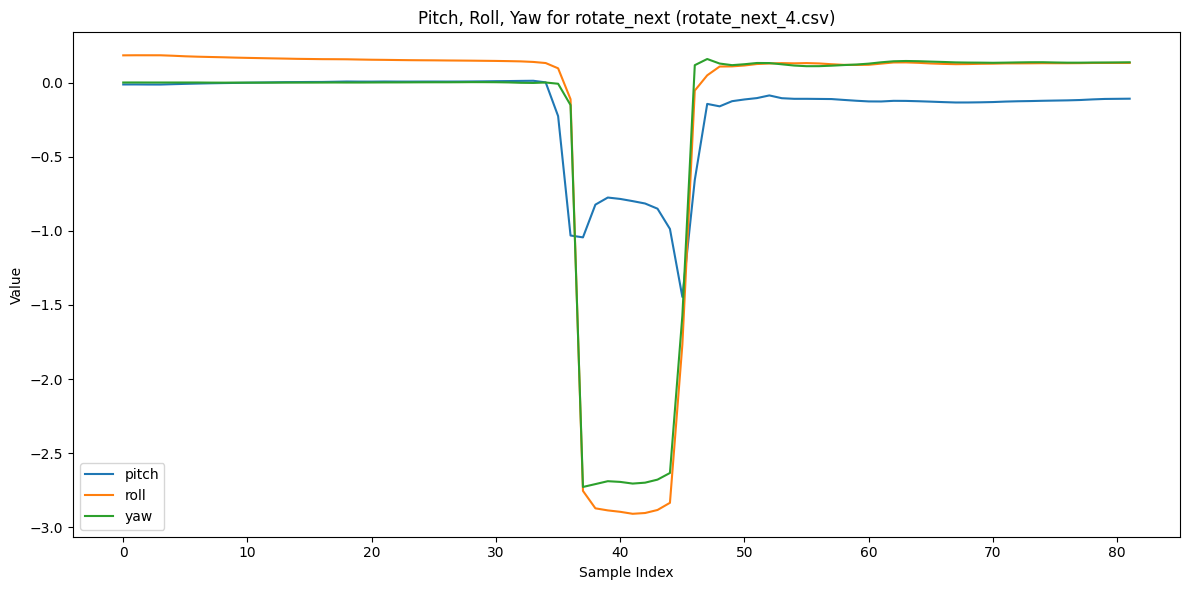

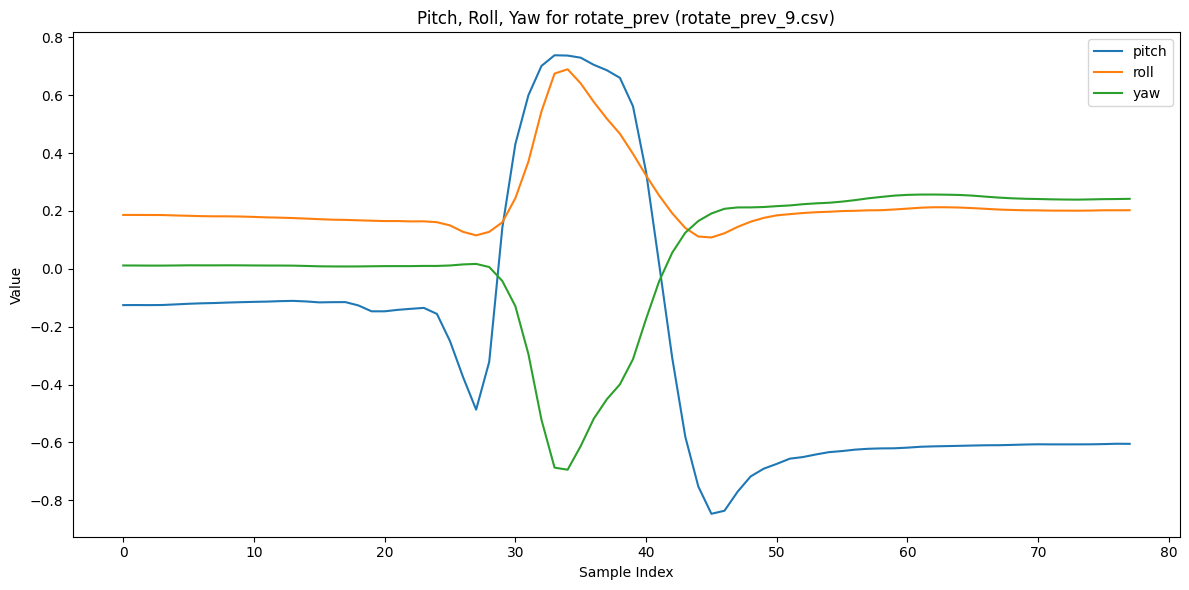

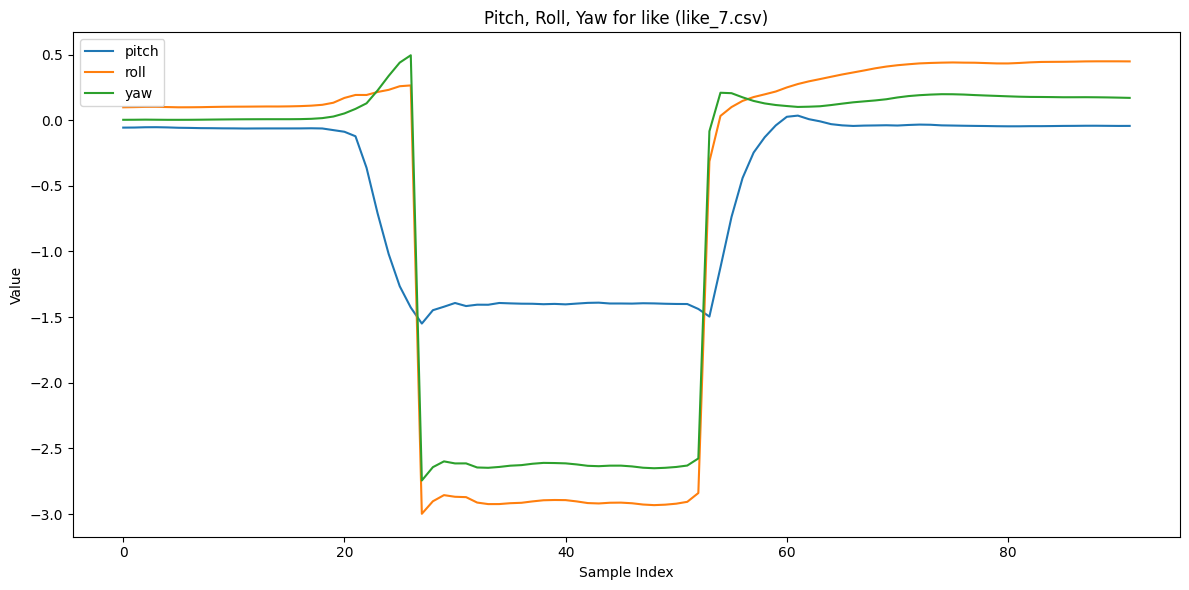

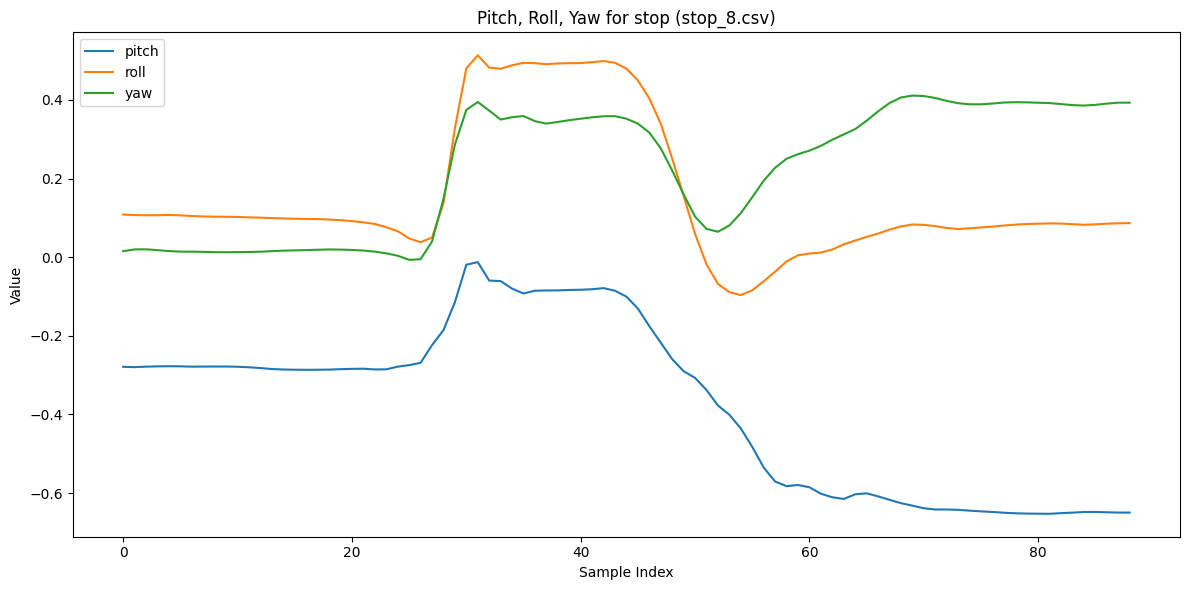

In [50]:
import matplotlib.pyplot as plt

for label in labels:
    csv_path = os.path.join(data_path, label, 'csv')
    files = os.listdir(csv_path)
    if not files:
        continue  # skip if no files in the folder
    file = files[0]  # take the first file for this label
    df = pd.read_csv(os.path.join(csv_path, file))
    plt.figure(figsize=(12, 6))
    plt.plot(df[' pitch'].values, label='pitch')
    plt.plot(df['roll'].values, label='roll')
    plt.plot(df['yaw'].values, label='yaw')
    plt.title(f'Pitch, Roll, Yaw for {label} ({file})')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()


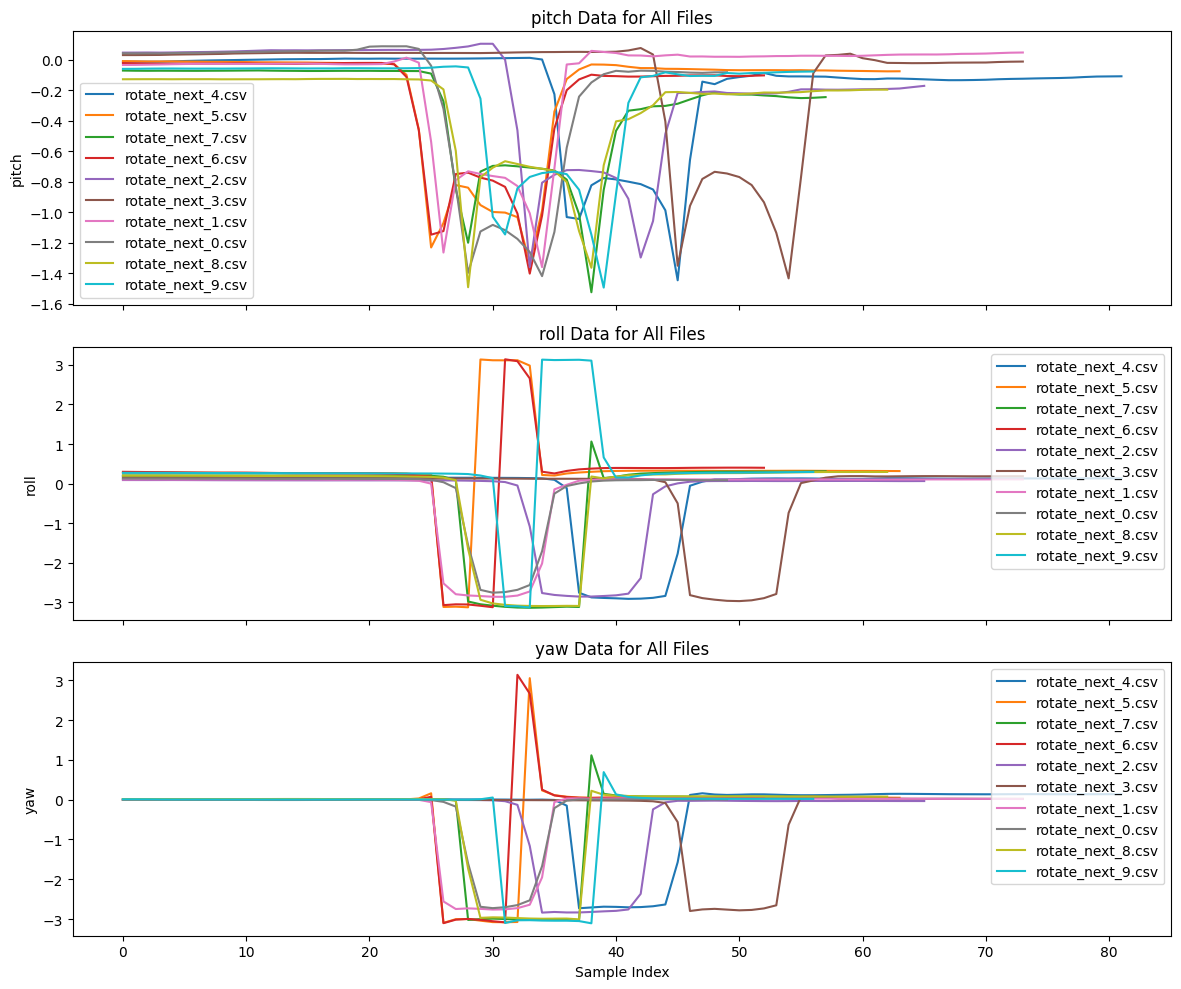

In [38]:
csv_path = os.path.join(data_path, labels[0], 'csv')

files = os.listdir(csv_path)
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

for file in files:
    df = pd.read_csv(os.path.join(csv_path, file))
    axs[0].plot(df[' pitch'].values, label=file)
    axs[1].plot(df['roll'].values, label=file)
    axs[2].plot(df['yaw'].values, label=file)

axs[0].set_title('pitch Data for All Files')
axs[0].set_ylabel('pitch')
axs[0].legend()

axs[1].set_title('roll Data for All Files')
axs[1].set_ylabel('roll')
axs[1].legend()

axs[2].set_title('yaw Data for All Files')
axs[2].set_xlabel('Sample Index')
axs[2].set_ylabel('yaw')
axs[2].legend()

plt.tight_layout()
plt.show()

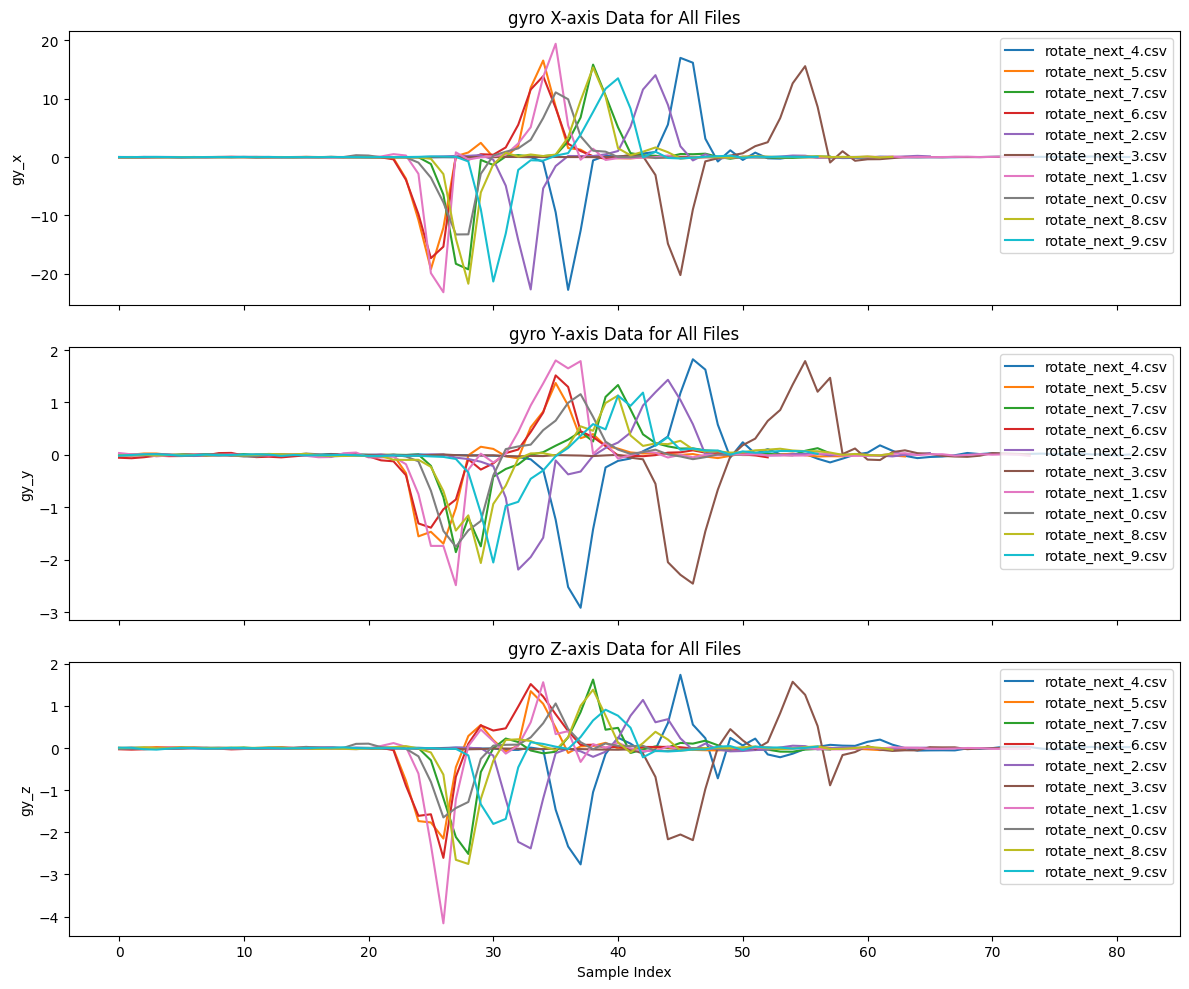

In [29]:
csv_path = os.path.join(data_path, labels[0], 'csv')

files = os.listdir(csv_path)
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

for file in files:
    df = pd.read_csv(os.path.join(csv_path, file))
    axs[0].plot(df['rotation_x'].values, label=file)
    axs[1].plot(df['rotation_y'].values, label=file)
    axs[2].plot(df['rotation_z'].values, label=file)

axs[0].set_title('gyro X-axis Data for All Files')
axs[0].set_ylabel('gy_x')
axs[0].legend()

axs[1].set_title('gyro Y-axis Data for All Files')
axs[1].set_ylabel('gy_y')
axs[1].legend()

axs[2].set_title('gyro Z-axis Data for All Files')
axs[2].set_xlabel('Sample Index')
axs[2].set_ylabel('gy_z')
axs[2].legend()

plt.tight_layout()
plt.show()

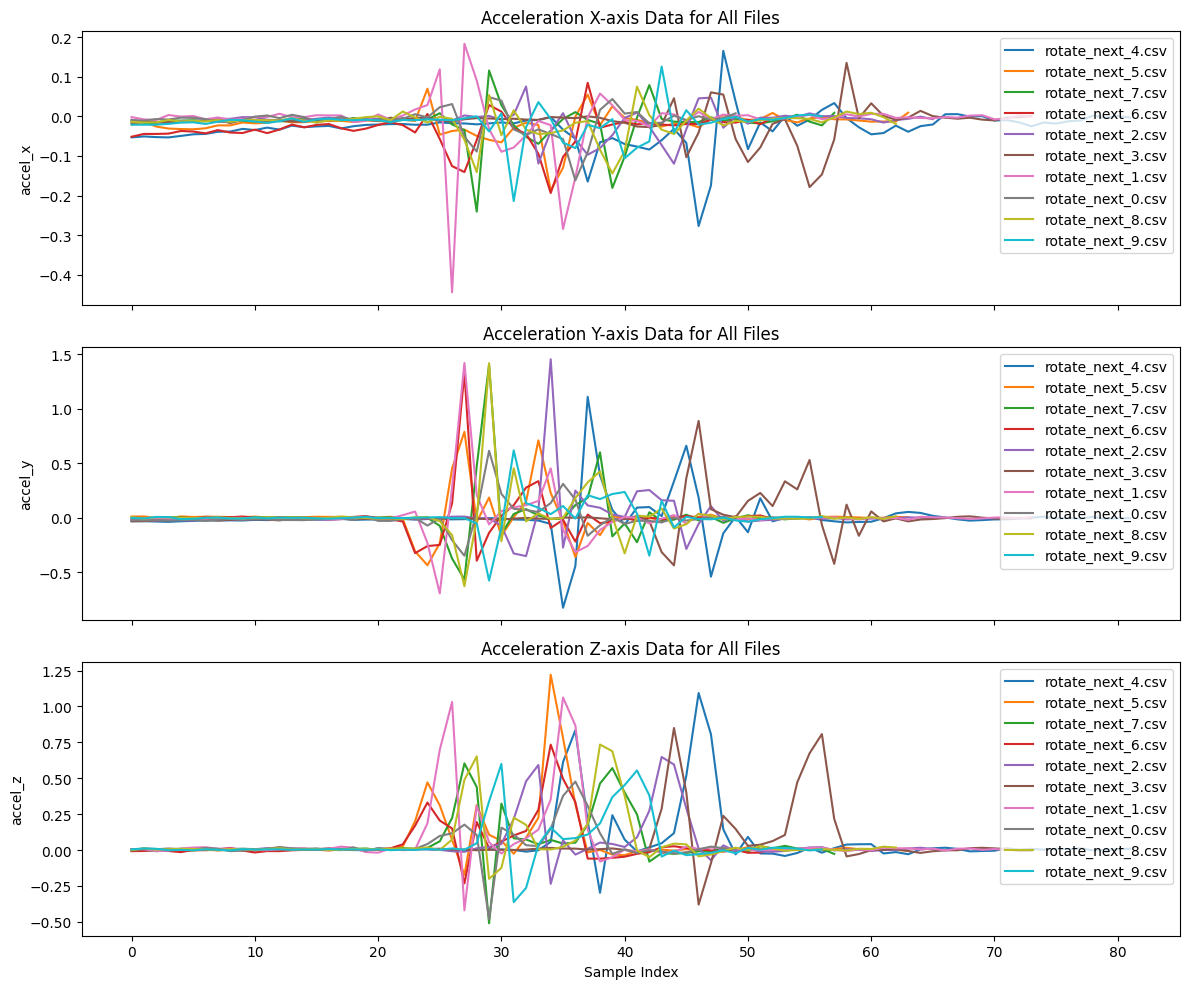

In [27]:
csv_path = os.path.join(data_path, labels[0], 'csv')

files = os.listdir(csv_path)
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

for file in files:
    df = pd.read_csv(os.path.join(csv_path, file))
    axs[0].plot(df['accel_x'].values, label=file)
    axs[1].plot(df['accel_y'].values, label=file)
    axs[2].plot(df['accel_z'].values, label=file)

axs[0].set_title('Acceleration X-axis Data for All Files')
axs[0].set_ylabel('accel_x')
axs[0].legend()

axs[1].set_title('Acceleration Y-axis Data for All Files')
axs[1].set_ylabel('accel_y')
axs[1].legend()

axs[2].set_title('Acceleration Z-axis Data for All Files')
axs[2].set_xlabel('Sample Index')
axs[2].set_ylabel('accel_z')
axs[2].legend()

plt.tight_layout()
plt.show()

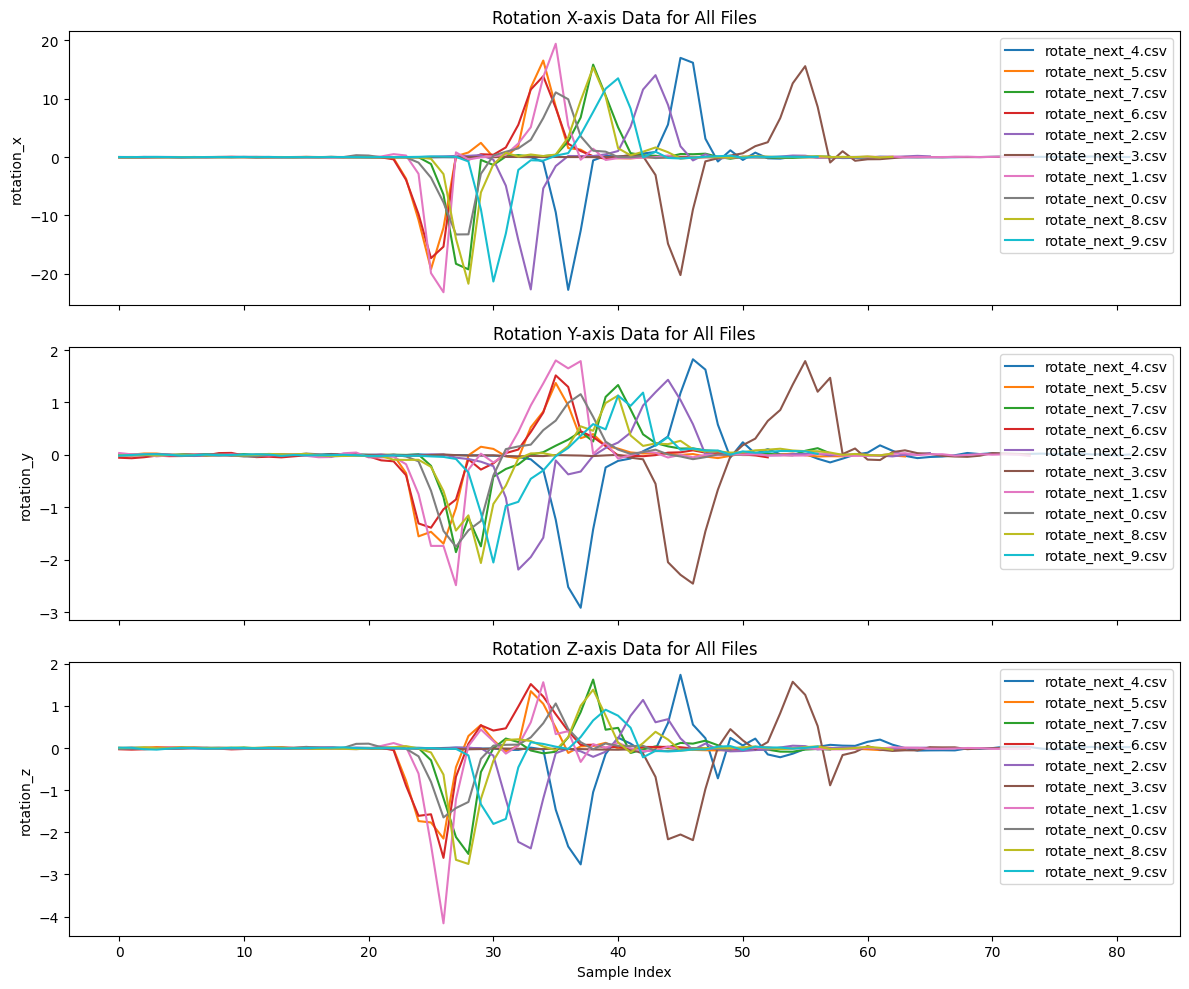

In [26]:
csv_path = os.path.join(data_path, labels[0], 'csv')

files = os.listdir(csv_path)
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

for file in files:
    df = pd.read_csv(os.path.join(csv_path, file))
    axs[0].plot(df['rotation_x'].values, label=file)
    axs[1].plot(df['rotation_y'].values, label=file)
    axs[2].plot(df['rotation_z'].values, label=file)

axs[0].set_title('Rotation X-axis Data for All Files')
axs[0].set_ylabel('rotation_x')
axs[0].legend()

axs[1].set_title('Rotation Y-axis Data for All Files')
axs[1].set_ylabel('rotation_y')
axs[1].legend()

axs[2].set_title('Rotation Z-axis Data for All Files')
axs[2].set_xlabel('Sample Index')
axs[2].set_ylabel('rotation_z')
axs[2].legend()

plt.tight_layout()
plt.show()

In [16]:
for label in labels:
    label_path = os.path.join(data_path, label)
    csv_path = os.path.join(label_path, 'csv')
    print(csv_path)
    print(os.listdir(csv_path))
    for csv_file in os.listdir(csv_path):
        new_csv_file = os.path.join(csv_path, csv_file)
        print("NEW FILE: ",new_csv_file)
        df = pd.read_csv(os.path.join(csv_path, csv_file))
        print(len(df))
        break

/Users/mylesgould/Downloads/project/data/rotate_next/csv
['rotate_next_4.csv', 'rotate_next_5.csv', 'rotate_next_7.csv', 'rotate_next_6.csv', 'rotate_next_2.csv', 'rotate_next_3.csv', 'rotate_next_1.csv', 'rotate_next_0.csv', 'rotate_next_8.csv', 'rotate_next_9.csv']
NEW FILE:  /Users/mylesgould/Downloads/project/data/rotate_next/csv/rotate_next_4.csv
82
/Users/mylesgould/Downloads/project/data/rotate_prev/csv
['rotate_prev_9.csv', 'rotate_prev_8.csv', 'rotate_prev_0.csv', 'rotate_prev_1.csv', 'rotate_prev_3.csv', 'rotate_prev_2.csv', 'rotate_prev_6.csv', 'rotate_prev_7.csv', 'rotate_prev_5.csv', 'rotate_prev_4.csv']
NEW FILE:  /Users/mylesgould/Downloads/project/data/rotate_prev/csv/rotate_prev_9.csv
78
/Users/mylesgould/Downloads/project/data/like/csv
['like_7.csv', 'like_6.csv', 'like_4.csv', 'like_5.csv', 'like_1.csv', 'like_0.csv', 'like_2.csv', 'like_3.csv', 'like_8.csv', 'like_9.csv']
NEW FILE:  /Users/mylesgould/Downloads/project/data/like/csv/like_7.csv
92
/Users/mylesgould/Do

In [90]:
from helper import *
#from helper import min_max_range
rotate_next_path = os.path.join(data_path, 'rotate_next')
rotate_next_csv_path = os.path.join(rotate_next_path, 'csv')

file_features = []
for csv_path in os.listdir(rotate_next_csv_path):
    print(csv_path)
    df = pd.read_csv(os.path.join(rotate_next_csv_path, csv_path))

    signal = df['rotation_x'].values

    signal_std = std(signal)
    signal_energy = energy(signal)
    signal_mean = np.mean(signal)
    #
    signal_max = max_val(signal)
    signal_min = min_val(signal)
    #signal_min_max = min_max_range(signal)
    signal_mam = median_above_mean(signal)
    signal_itqr = interquartile_range(signal)
    signal_skewness = skewness(signal)
    signal_psd = psd_features(signal)

    file_features.append({
        'file': csv_path,
        'std': signal_std,
        'energy': signal_energy,
        'mean': signal_mean,
        'max': signal_max,
        'min': signal_min,
        #'min_max_range': signal_min_max,
        'median_above_mean': signal_mam,
        'interquartile_range': signal_itqr,
        'skewness': signal_skewness,
        'psd_features': signal_psd
    })


    print(f"\tFile: {csv_path}")
    print(f"\tStandard Deviation: {signal_std}")
    print(f"\tEnergy: {signal_energy}")
    print(f"\tMean: {signal_mean}")
    print(f"\tMax: {signal_max}")         
    print(f"\tMin: {signal_min}")
    #print(f"\tMin-Max Range: {signal_min_max}")
    print(f"\tMedian Above Mean: {signal_mam}")
    print(f"\tInterquartile Range: {signal_itqr}")
    print(f"\tSkewness: {signal_skewness}")
    print(f"\tPSD Features: {signal_psd}")
    print(f"\tFile: {csv_path}, Length: {len(df)}\n\n")




    



    #print(len(df))
    #print(df.head())

rotate_next_4.csv
	File: rotate_next_4.csv
	Standard Deviation: 4.076262345760535
	Energy: 16.616516506643226
	Mean: -0.024531513977818577
	Max: 17.002565383911133
	Min: -22.752086639404297
	Median Above Mean: 0.0098924371413886
	Interquartile Range: 0.04889160161837927
	Skewness: -0.9311554637565881
	PSD Features: {'meanPSD': 1.6188396132789005, 'stdPSD': 2.371468067548263, 'maxPSD': 8.923709161647603, 'medianPSD': 0.4232022041161833, 'entroS': 4.102106456007919}
	File: rotate_next_4.csv, Length: 82


rotate_next_5.csv
	File: rotate_next_5.csv
	Standard Deviation: 4.238962692411184
	Energy: 17.9695651745023
	Mean: -0.02757656339053941
	Max: 16.543209075927734
	Min: -19.20450210571289
	Median Above Mean: -0.0041740555316209
	Interquartile Range: 0.03397780354134733
	Skewness: -0.6494783659195462
	PSD Features: {'meanPSD': 1.6193893182365946, 'stdPSD': 2.592594611835257, 'maxPSD': 9.609365968473794, 'medianPSD': 0.23968145668950686, 'entroS': 3.58197379798795}
	File: rotate_next_5.csv, 

In [ ]:
import matplotlib.pyplot as plt

feature_names = [k for k in file_features[0].keys() if k not in ['file', 'psd_features']]
file_names = [f['file'] for f in file_features]

# Transpose the feature matrix: rows = files, columns = features
feature_matrix = np.array([[f[feat] for feat in feature_names] for f in file_features])

fig, ax = plt.subplots(figsize=(12, 6))


# Yes, this computes the average of each feature across all files (i.e., averages across rows for each column/feature)
avg_feature_values = np.mean(feature_matrix, axis=0)

for i, file in enumerate(file_names):
    ax.plot(feature_names, feature_matrix[i], marker='o', label=file)
ax.set_ylabel('Feature Value')
ax.set_xlabel('Feature')
ax.set_title('Feature Values Across Files')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot PSD features
psd_feature_names = list(file_features[0]['psd_features'].keys())
psd_feature_matrix = np.array([[f['psd_features'][k] for k in psd_feature_names] for f in file_features])

fig, ax = plt.subplots(figsize=(12, 6))
for i, file in enumerate(file_names):
    ax.plot(psd_feature_names, psd_feature_matrix[i], marker='o', label=file)
ax.set_ylabel('PSD Feature Value')
ax.set_xlabel('PSD Feature')
ax.set_title('PSD Feature Values Across Files')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


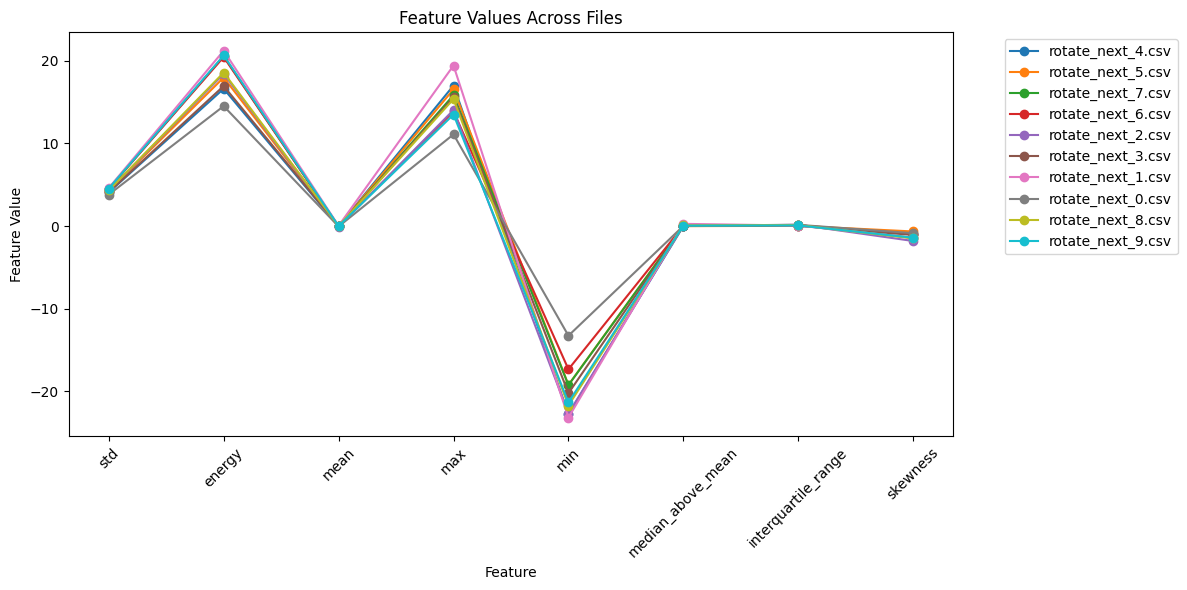

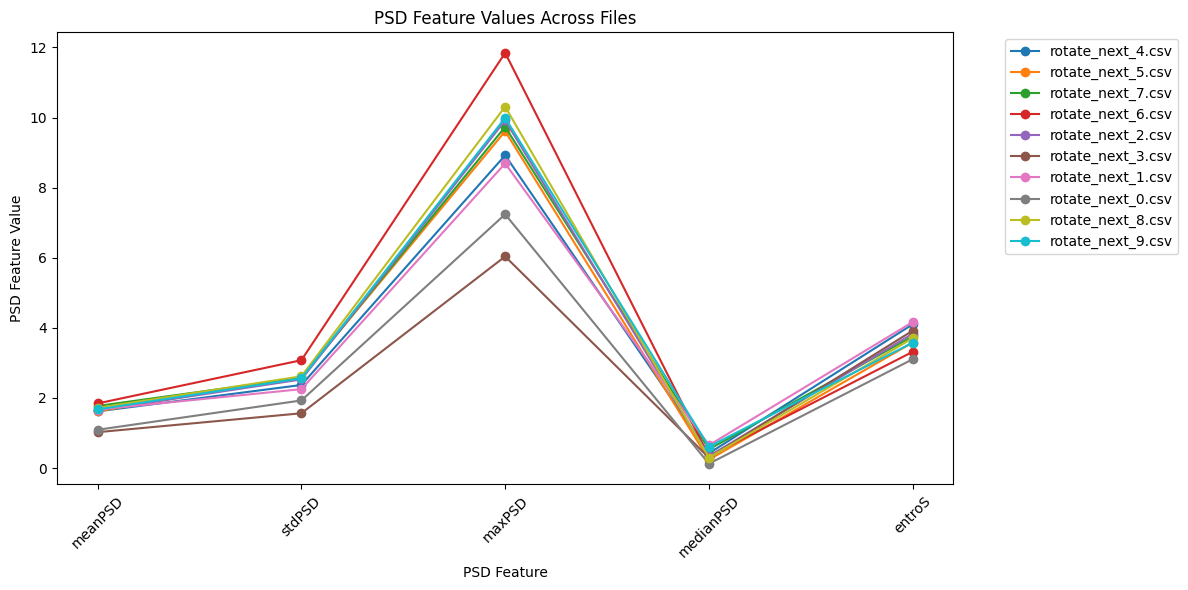

In [93]:
import matplotlib.pyplot as plt

feature_names = [k for k in file_features[0].keys() if k not in ['file', 'psd_features']]
file_names = [f['file'] for f in file_features]

# Transpose the feature matrix: rows = files, columns = features
feature_matrix = np.array([[f[feat] for feat in feature_names] for f in file_features])

fig, ax = plt.subplots(figsize=(12, 6))
for i, file in enumerate(file_names):
    ax.plot(feature_names, feature_matrix[i], marker='o', label=file)
ax.set_ylabel('Feature Value')
ax.set_xlabel('Feature')
ax.set_title('Feature Values Across Files')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot PSD features
psd_feature_names = list(file_features[0]['psd_features'].keys())
psd_feature_matrix = np.array([[f['psd_features'][k] for k in psd_feature_names] for f in file_features])

fig, ax = plt.subplots(figsize=(12, 6))
for i, file in enumerate(file_names):
    ax.plot(psd_feature_names, psd_feature_matrix[i], marker='o', label=file)
ax.set_ylabel('PSD Feature Value')
ax.set_xlabel('PSD Feature')
ax.set_title('PSD Feature Values Across Files')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
for csv_path in os.listdir(rotate_next_csv_path):
    print(csv_path)
    df = pd.read_csv(os.path.join(rotate_next_csv_path, csv_path))
    print(len(df))
    print(df.head())

rotate_next_4.csv
82
   timestamp   accel_x   accel_y   accel_z  rotation_x  rotation_y  \
0   0.053535 -0.053098 -0.032108  0.001994   -0.001712    0.008935   
1   0.081419 -0.050771 -0.031471  0.000702   -0.006158    0.006912   
2   0.130572 -0.052456 -0.034788 -0.007861   -0.010919    0.000560   
3   0.180892 -0.053237 -0.037674 -0.003116    0.003838    0.003264   
4   0.230779 -0.049445 -0.032392 -0.004779    0.002000   -0.003520   

   rotation_z     pitch      roll       yaw  
0    0.002558 -0.012165  0.184357  0.001125  
1   -0.001807 -0.011956  0.184924  0.001288  
2   -0.006734 -0.012511  0.184822  0.001053  
3    0.003195 -0.012650  0.184733  0.001047  
4    0.000923 -0.010266  0.181693  0.001066  
rotate_next_5.csv
64
   timestamp   accel_x   accel_y   accel_z  rotation_x  rotation_y  \
0   0.056528 -0.020746  0.011125  0.006011   -0.002200    0.012796   
1   0.080454 -0.014083  0.011870  0.001608   -0.031443    0.005027   
2   0.130548 -0.025808 -0.002540  0.005879   -0.014

In [ ]:
def create_half_overlapping_windows(data, window_size=20):
    windows = []
    labels = []
    
    # Calculate step size for half overlap
    step_size = window_size // 2
    
    for i in range(0, len(data) - window_size + 1, step_size):
        window = data.iloc[i:i+window_size]
        window_features = window.values.flatten()
        windows.append(window_features)
        labels.append(window.iloc[-1]['label'])